In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('model_means.csv')
df.columns=['term', 'weight']
df.head()

,term,weight
0,NaN,0.829045
1,1.0.0.0.0.0,-13.229555
2,2.0.0.0.0.0,29.089885
3,0.1.0.0.0.0,-48.060947
4,1.1.0.0.0.0,35.213125


In [41]:
terms = ['u', 'g', 'r', 'i', 'z', 'y', 'bias']
translation = {i: terms[i] for i in range(len(terms))}
translation

{0: 'u', 1: 'g', 2: 'r', 3: 'i', 4: 'z', 5: 'y', 6: 'bias'}

In [42]:
def convert_to_element(string):
    # convert string (e.g. 1.0.0.0.0.0 to an element in heatmap matrix)
    if pd.isna(string):
        return [6, 6]
    
    split = string.split('.')
    if '2' in split:
        return [split.index('2'), split.index('2')]
    
    elif split.count('1') == 2:
        return [split.index('1'), 5 - split[::-1].index('1')]
    
    else:
        return [split.index('1'), 6]

In [43]:
# translate coefficient terms to matrix elements
df['row'] = df['term'].apply(lambda x: convert_to_element(x)[0])
df['col'] = df['term'].apply(lambda x: convert_to_element(x)[1])
df

,term,weight,row,col
0,NaN,0.829045,6,6
1,1.0.0.0.0.0,-13.229555,0,6
2,2.0.0.0.0.0,29.089885,0,0
3,0.1.0.0.0.0,-48.060947,1,6
4,1.1.0.0.0.0,35.213125,0,1
5,0.2.0.0.0.0,107.152674,1,1
6,0.0.1.0.0.0,281.426367,2,6
7,1.0.1.0.0.0,-480.282675,0,2
8,0.1.1.0.0.0,-655.888127,1,2
9,0.0.2.0.0.0,-99.635612,2,2


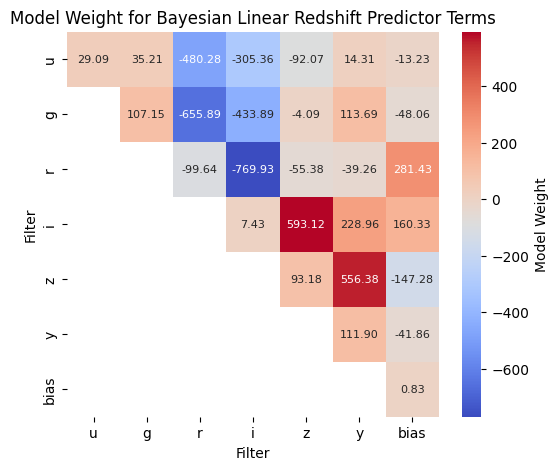

In [65]:
matrix = df.pivot(index='row', columns='col', values='weight')

# Step 3: Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Model Weight'},
            annot_kws={'size': 8})
plt.title('Model Weight for Bayesian Linear Redshift Predictor Terms')
plt.xlabel('Filter')
plt.ylabel('Filter')
plt.xticks(
    ticks=[x + .5 for x in translation.keys()],
    labels=list(translation.values()))
plt.yticks(
    ticks=[x + .5 for x in translation.keys()],
    labels=list(translation.values())
    )
plt.show()